# Math for ML: Calculus and Optimization

In this part of the series on math for machine learning I'll focus just on the basic calculus needed to understand machine learning algorithms.

Calculus is essentially the study of the continuum. Important things that calculus seeks to understand are:
- Infinitesimals: How to manipulate numbers that are "infinitely" small or large.
- Limits: What happens when numbers get arbitrarily close to each other.
- Differentiation: How one variable changes continuously in response to one or more other variables. 
- Integration: How to add up infinitely many numbers to get a finite number, e.g. to calculate areas and volumes of things.

Be advised that a lot of this lesson will be marked with terms like "aside" or "optional", and I'll frequently say "you don't actually need to know the details of this, just the concepts of it". It turns out relatively little calculus is actually needed to do machine learning. In fact, if you abstract away the ideas of probability distributions and neural network backpropagation, you don't *really* need to know any calculus at all. This section is most useful if you want to develop a deeper understanding of how the algorithms work, not just use them.

## Infinitesimals

Fundamental to the understanding of calculus is the idea of an "infinitely small" number. A number that's not 0 but so close to being 0 that you can't really tell it isn't 0. These small numbers are often written in math with letters like $\varepsilon$ or $\delta$. Think of them as *very very* tiny numbers, so tiny their square is basically 0:
$$\varepsilon > 0, \quad \varepsilon^2 \approx 0.$$

But what does this even mean? Here it might be helpful to recall our discussion of floating point numbers. Recall that we can't get infinite precision. In double precision, we only have 11 bits for an exponent and 52 bits for the mantissa. If we pick a number that uses 11 bits of binary exponent (a really small number), then if we square it its exponent would require more than 11 bits to represent, so it *literally* would have a square of zero as far as the computer is concerned.

Just for fun let's look at the *really* tiny number $10^{-200}$, or `1e-200`. That's 200 decimal places of zeros before the 1 even shows up. Python thinks `1e-200` is just fine. But what happens if we square it? We should in theory get $10^{-400}$, or 400 decimal places of zeros followed by a 1. But as far as floating point is concerned, the square is zero!

In [15]:
epsilon = 1e-200
epsilon, epsilon ** 2

(1e-200, 0.0)

Of course, you could argue that we could just go to a higher precision then. Use more bits. But eventually, if we keep making `epsilon` small enough we'll hit a point where `epsilon ** 2 = 0.0`. Thus, if it makes you feel better, when you see an infinitesimal just think "$10^{-200}$ or `1e-200` in double precision".

In practice, when using infinitesimals on a computer we're more likely to use an `epsilon` like `1e-3` or `1e-5`. Yes, in those cases their square is non-zero, but they turn out to be much more numerical friendly to work with. Remember the whole weirdness involved with numerical roundoff when doing floating point arithmetic. While a larger number like `1e-5` will leave an error in the calculation, it's much nicer to add or multiply with another float than say `1e-300`. We have other ways of dealing with the errors arising from the fact that these numbers aren't small enough.

Infinitesimals are especially interesting when added to regular numbers. For example, consider some number $x$. It could be 2 or -100 or whatever you want. Suppose now we add to it an infinitesimal number $\varepsilon$. What's the square of this new number? We'd have
$$(x + \varepsilon)^2 = x^2 + 2x\varepsilon + \varepsilon^2.$$
But since $\varepsilon^2 \approx 0$,
$$(x + \varepsilon)^2 \approx x^2 + 2x\varepsilon.$$

Okay, but what does this mean? Well, I can reformulate the question as follows: "If I change $x$ by a little bit, how much does the function $y=x^2$ change"? If $x$ is nudged to a value close by of $x+\varepsilon$, then $y$ necessarily gets nudged to a new value $(x+\varepsilon)^2$. 

So how much does $y$ change? Evidently it's just
$$(x+\varepsilon)^2 - x^2 \approx 2x\varepsilon.$$
That is, if we change $x$ by a small amount $\varepsilon$, then $y$ itself changes by an amount $2x\varepsilon$. Interestingly, how much $y$ changes actually depends on which $x$ we pick. If $x=1$ then $y$ changes by $2\varepsilon$, just twice how much $x$ is nudged. If $x=1000$ though, then $y$ changes by $2000\varepsilon$, a much bigger change.

**Aside:** Pick some value $x=x_0$, say $x=2$. Observe that by setting $\varepsilon=0$ directly in the above calculation gives the result $f(x_0)=x_0^2$. That is, it essentially just evaluates the function at $x_0^2$. This idea of setting $\varepsilon=0$ is called taking the **limit**. You can imagine the idea of making $\varepsilon$ smaller and smaller and smaller until you get the exact value of $f(x_0)=x_0^2$ at $x_0$. For technical reasons, when people do this they write
$$\lim_{x \rightarrow x_0} f(x) = f(x_0),$$
and say "the limit of $f(x)$ as $x$ approaches $x_0$ is $f(x_0)$". In my experience, limits don't really tend to show up in machine learning, so you really don't need to know this. Just for your own edification.

## Differentiation

When talking about things like "if we change $x$ a little bit, how much does $y$ change", we typically use a special notation to make it clear what is a small change of what. Instead of writing $\varepsilon$ we just write $dx$ to indicate "a little bit of $x$". For "a little bit of $y$" we'd write $dy$. Note that both $dx$ and $dy$ are always infinitesimals, but their *ratio* is not as we'll see in a second. When using this $d$ notation, the values $dx$ and $dy$ are sometimes called **differentials**.

In this notation, we'd say "if $x$ changes to $x+dx$, then $y$ changes to $y+dy$". The small change we're solving for is then just $dy$, the amount $y$ changes if $x$ is changed by $dx$:
$$y + dy = f(x+dx) = (x + dx)^2 = x^2 + 2xdx + dx^2 \approx 2xdx.$$
So $dy \approx 2xdx$, or (re-writing just because I can),
$$\frac{dy}{dx} = 2x.$$

This ratio of differentials $\frac{dy}{dx}$ is called the **derivative** of the function $y=x^2$. The act of taking a derivative is called **differentiation**. Notice there's no infinitesimal ($dy$ or $dx$) on the right-hand side, hence the derivative is not a small number. In fact it's on the scale of $x$ in this case.

Let's try to calculate this derivative for a specific value of $x$, say $x=1$, by taking the smaller and smaller values of $dx$ and seeing what the results look like. To do this, I'll define a loop over some values of $dx$ and see what the predicted derivative is. The exact answer at $x=1$ should be $\frac{dy}{dx}\big |_{x=1}=2(1)=2$. Read this as "the derivative of $y$ with respect to $x$ evaluated at $x=1$ is $2$". I'll also print out the error, which is the predicted value $2$ minus the calculated value. Smaller error is better, obviously.

In [14]:
f = lambda x: x ** 2 # the function we want to differentiate
x0 = 1 # the value of x to calculate the derivative at
dydx_exact = 2 * x0 # the exact value of the derivative (if you have it)
for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    dydx1 = (f(x0 + dx) - f(x0)) / dx
    error = dydx1 - dydx_exact
    print(f'dx = {dx:8.4f} \t dydx = {dydx1:4f} \t error = {error:4f}')

dx =   1.0000 	 dydx = 3.000000 	 error = 1.000000
dx =   0.1000 	 dydx = 2.100000 	 error = 0.100000
dx =   0.0100 	 dydx = 2.010000 	 error = 0.010000
dx =   0.0010 	 dydx = 2.001000 	 error = 0.001000
dx =   0.0001 	 dydx = 2.000100 	 error = 0.000100


Starting with `dx=1` is a bad choice with a huge error of `1.0`. We're way off. Shrinking to `dx=0.1` puts us in the ball park with a value `dydx = 2.1`. You can see that making `dx` successively smaller and smaller makes the error successively smaller, in this case by a factor of 10 each time. This is essentially how derivatives are calculated on a computer. We choose a small value of `dx` and just apply the formula above, with some minor tweaks to get better accuracy in fewer steps. Feel free to play with different functions and values to get a feel for it.

**Aside:** What happens above if you pick a `dx` value that's really small, say our infinitesimal value of $10^{-200}$. Try it out. This is why in practice it's good to pick larger values for `dx` when actually calculating these derivatives on a computer (called *numerical differentiation*).

We can talk about any function $f(x)$ having a derivative like this (provided it's reasonably well behaved). If $y=f(x)$ and we nudge $x$ to a close by value $x+dx$, then $y$ gets nudged by $y+dy=f(x+dx)$. The amount $y=f(x)$ changes *per amount* $dx$ is then the derivative
$$\frac{dy}{dx} = \frac{f(x+dx)-f(x)}{dx}.$$
Note this definition is only exact when $dx$ is infinitesimal. For finite values of $dx$ like what we'd code up on a computer this equality is only approximately true.

The derivative has an interesting and useful geometric interpretation as the **slope** of the curve $y=f(x)$ at the point $x$. To see this, imagine a right triangle with length $dx$ and height $dy$. The slope of its hypotenuse is just the rise over over the run, i.e. the ratio $\frac{dy}{dx}$. Since $dy$ is a function of $x$, the shape of the triangle will change for each $x$, hence so will the slope.

Conceptually, the derivative captures the rate at which changing an input changes the output. If the derivative is small, changing the input doesn't change the output much. If it's high, changing the input a little will change the output a lot. A positive derivative will make the output larger if the input increases. A negative derivative will make the output smaller if the input increases. If the derivative is zero, the output won't respond at all to changes in the input.

Here's an example to help you visualize what derivatives are. I'll plot the function $y=x^2$ and its *tangent* at a point $x_0=2$ on the x-axis. The corresponding $y$ value at $x_0$ is just $y_0=x_0^2=4$. The tangent is then the line of slope $\frac{dy}{dx}$ centered at the point of interest $(x_0,y_0)$, i.e. the line given by
$$y = y_0 + \frac{dy}{dx}\bigg|_{x=x_0}(x - x_0).$$
The notation with the vertical line with $x=x_0$ at the bottom is just a way of saying "pick out the value of the derivative specifically when $x=x_0$". Again, pay no attention yet to the plot function, as we'll cover that stuff more later. The tangent line calculation in the code below is 
```
y_tangent = y0 + dydx0 * (x - x0).
```

Feel free to adjust the value of `x0` though and observe how the slope changes with the value you pick. In all cases, the line should hug the curve of the function and stay tangent to it. If you're used to numpy already you can play around with the function itself as well by changing the line `y = x ** 2` to any other function you want.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

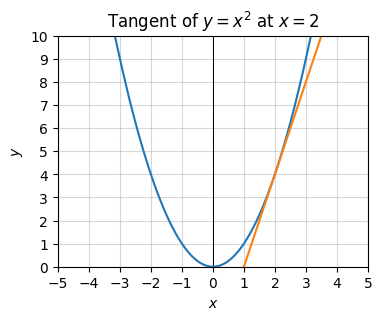

In [3]:
x0 = 2 # the point we want the tangent at

x = np.arange(-10, 10, 0.1)
y = x ** 2

dx = 1e-5
x_nudged = x + dx
y_nudged = x_nudged ** 2
dy = y_nudged - y

idx_x_eq_x0 = np.where(np.abs(x - x0) < dx)[0].item()
y0, dydx0 = y[idx_x_eq_x0], (dy / dx)[idx_x_eq_x0].flatten()

y_tangent = y0 + dydx0 * (x - x0)

plot_function(x, (y, y_tangent), (-5, 5), (0, 10), title=f'Tangent of $y=x^2$ at $x={x0}$')

Derivatives obey several laws that you can easily derive from our infinitesimal definition above. For example, here's a derivation of the additive law of derivatives, which states that if $u=g(x)$ and $v=h(x)$ are two different functions, then the derivative of their *sum* $y = f(x) = g(x)+h(x)$ is the sum of their individual derivatives:
$$\frac{d(u+v)}{dx} = \frac{du}{dx} + \frac{dv}{dx}.$$

Let $y=u+v$. Using the rule $y + dy = f(x+dx)$, we have
$$
\begin{align}
dy &= f(x+dx)-f(x) \\
&= \big(g(x+dx)+h(x+dx)\big)-\big(g(x)+h(x)\big) \\
&= \big(g(x+dx)-g(x)\big)+\big(h(x+dx)-h(x)\big) \\
&= du + dv.
\end{align}
$$
Dividing both sides through by $dx$ gives the additive law for derivatives. Q.E.D.

Here are some other laws. For machine learning you don't really need to memorize any of these except *maybe* the chain rule, which is the backbone of the backpropagation algorithm we'll see later. To save space I'll state them in differential form, i.e. not dividing through by $dx$.

Derivative Laws:
- Additive Rule: $d(u + v) = du + dv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Constant Rule: $d(cy) = c dy$ for any constant $c$,
- Product Rule: $d(uv)=udv + vdu$ for any two functions $u=f(x)$ and $v=g(x)$,
- Quotient Rule: $v^2 d(\frac{u}{v}) = vdu-udv$ for any two functions $u=f(x)$ and $v=g(x)$,
- Chain Rule: $dy = \frac{dy}{dz} dz$ for any compositional function $y=f(z)$ and $z=g(x)$, i.e. $y=f(g(x))$.

**Begin Optional Content**

For the sake of completeness I'll list the derivatives of a few common classes of functions as well. You don't need to memorize these either. I'll again write them in differential form to save space. It's completely equivalent.

Common Derivatives:
- $d(c) = 0$ for any constant $c$,
- $d(x^n) = nx^{n-1}dx$ for any real number $n \neq 0$
- $d(e^x) = e^xdx$,
- $d(\log(x)) = \frac{1}{x}dx$,
- $d(\sin(x)) = \cos(x)dx$,
- $d(\cos(x)) = -\sin(x)dx$,
- $d(\text{sigmoid}(x)) = \text{sigmoid}(x)\big(1-\text{sigmoid}(x)\big)dx$,
- $d(\tanh(x)) = \big(1 - \tanh^2(x)\big)dx$.

**Aside:** Annoyingly there are many different notations for the derivative. I find the ratio of differentials notation the most intuitive since it tells you exactly what it is. Other notations for the derivative of a function $y=f(x)$ are $f'(x)$, $y'$, $\dot y$, $\nabla y$, and $D f(x)$. I'll try to avoid these in this book for the most part.

**Tangent:** One of my favorite tools for calculating derivatives symbolically is [WolframAlpha](https://www.wolframalpha.com/). You can just type what you want to take the derivative of in more or less natural language and it'll usually figure out what you mean and instantly give you the right answer. It's usually easier to go to their website and type your query in the search bar. But it turns out you can use WolframAlpha as an API too. This neat trick lets me show a couple of examples without having to leave the notebook. Note that WolframAlpha can do *far* more than just calculate derivatives. See their documentation for more info.

Here are the derivatives of a couple of functions I typed in.

**Note:** If you want to play with WolframAlpha it's probably easier to just go to their webpage via the above link. If you want to keep things in the notebook too you'll need to create an account and register for a free API key [here](https://products.wolframalpha.com/api). You'll also need to `pip install wolframalpha` in your environment and be connected to the internet.

In [4]:
query_wolfram_alpha('d/dx e^x + x^2 - log(x)')

'd/dx(e^x + x^2 - log(x)) = 2 x + e^x - 1/x'

In [5]:
query_wolfram_alpha('d/dx (x^5 - 5*sin(x)) / (e^x + log(x))')

'd/dx((x^5 - 5 sin(x))/(e^x + log(x))) = (5 (e^x + log(x)) (x^4 - cos(x)) - (e^x + 1/x) (x^5 - 5 sin(x)))/(e^x + log(x))^2'

Note that you don't need to memorize any of these rules in practice. It's more important to have a conceptual understanding of them than a rigorous understanding. A couple reasons for this.
- Modern day ML uses a trick called autodifferentiation to get around having to actually calculate derivatives. 
- There are tools that will automatically calculate derivatives for you when you need them. 

**End Optional Content**

## Integration

The other half of calculus is essentially about summing up small things to get big things. By small things of course we again mean infinitesimals. Suppose we have a bunch of infinitesimals $\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_n$. Like any other number we can add them together to get a new infinitesimal
$$\varepsilon = \varepsilon_1 + \varepsilon_2 + \cdots + \varepsilon_n.$$

Take $\varepsilon=10^{-200}$ for example. We showed that as far as a computer is concerned $\varepsilon^2=0$. But what happens if we instead start adding up a bunch of $\varepsilon$? Suppose we add up $\varepsilon$ $N$ times. If $N$ is any reasonably sized finite number, a number like $N=1000$, $\varepsilon$ will still be infinitesimal. But what about if we make $N$ *huge*, infinite for practical purposes, say $N=10^{200}$? Then we just get $N\varepsilon=1$, a finite number.

In [1]:
epsilon = 1e-200
N = 1000
N * epsilon, (N * epsilon) ** 2

(1e-197, 0.0)

In [2]:
epsilon = 1e-200
N = 1e200
N * epsilon, (N * epsilon) ** 2

(1.0, 1.0)

If we add up only a *finite* number of infinitesimals we'll again get an infinitesimal, so in the case above $\varepsilon$ is again an infinitesimal assuming $n$ is finite. But if we add up *infinitely* many infinitesimals we'll get something finite. This is the idea behind integration.

Suppose we have again a function $y=f(x)$. For example, $y=\sqrt{x}$.

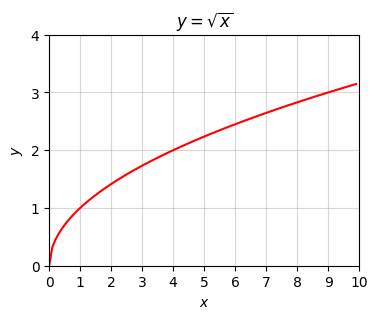

In [3]:
x = np.arange(0, 10, 0.1)
y = np.sqrt(x)
plot_function(x, y, (0, 10), (0, 4), title='$y=\sqrt{x}$')

Approximate Area: 22.468278186204103


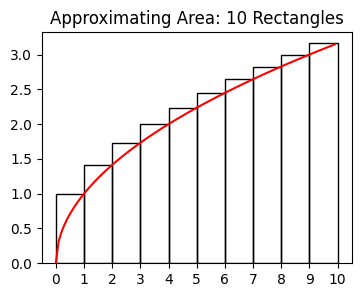

In [51]:
def plot_area_under_curve(x, y, dx=1, title='', all_ticks=True):
    x_rect = np.arange(min(x), max(x), dx) + dx / 2
    n_rects = len(x_rect)
    y_rect = np.sqrt(x_rect + dx / 2)
    print(f'Approximate Area: {np.sum(y_rect * dx)}')
    plt.figure(figsize=(4, 3))
    plt.plot(x, y, color='red')
    plt.bar(x_rect, y_rect, width=dx, alpha=1, edgecolor='black', facecolor='none', linewidth=1)
    plt.title(f'Approximating Area: {n_rects} Rectangles')
    if all_ticks:
        plt.xticks(np.arange(min(x), max(x) + 1))
    plt.show()
    
plot_area_under_curve(x, y, dx=1.0)

Approximate Area: 21.380011968222313


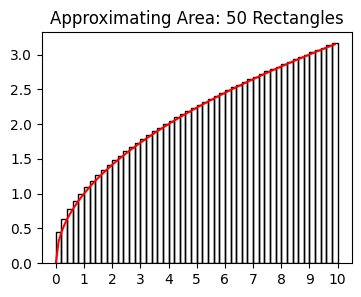

In [52]:
plot_area_under_curve(x, y, dx=0.2, title=f'Approximating Area: {n_rects} Rectangles')

Suppose for whatever reason we're interested in the area bounded by the curve $y=\sqrt{x}$ and the $x$ axis, say from $x=0$ to $x=10$. How would we calculate this? One idea might be to approximate the function with rectangles of width $dx=1$ and height $f(x)$, where $x$ is taken at each integer value $x=1,2,3,\cdots,10$. Then approximately speaking the area would just be the sum of all these rectangles:

$$
\begin{align}
\text{area} &\approx f(1)dx + f(2)dx + f(3)dx + \cdots + f(10)dx \\
&= f(1) + f(2) + f(3) + \cdots + f(10) \\
&= \sqrt{1} + \sqrt{2} + \sqrt{3} + \cdots + \sqrt{10} \\
&\approx 22.468
\end{align}
$$

Unfortunately there's an error in this answer. These rectangles tend to *overestimate* the area. The exact answer turns out to be $\frac{20}{3}\sqrt{10} \approx 21.082$. How can we improve this estimate? Use more rectangles! Our problem was that the rectangles we used were too coarse. What we need to do is make $dx$ smaller and the number of rectangles used bigger.

Suppose $N$ is the number or rectangles. We'll take the heights of the function at each equal length point $x_1,x_2,\cdots,x_N$, each of width $dx$. Then
$$\text{area} \approx f(x_1)dx + f(x_2)dx + f(x_3)dx + \cdots + f(x_N)dx.$$
It's annoying to write out these sums like this, so we have a shorthand for it using the capital sigma, $\sum$:
$$ \text{area} \approx \sum_{n=1}^{N} f(x_n) dx.$$
Read the righthand side of this expression as "the **sum** of $f(x_n)dx$ from $n=1$ to $n=N$" (in integer steps). It means exactly the same thing as the longhand form $f(x_1)dx + \cdots + f(x_N)dx$, except it's more compact. 

If we keep making these rectangles smaller and smaller until $dx$ is infinitesimal and the number or rectangles is infinite, we'll get the *exact* area. In this situation we use a different symbol, $\int$, a long S that looks like the S in "sum". It basically means the same thing that $\Sigma$ does above, except it's understood that we're summing over infinitely many infinitesimal terms $f(x)dx$:
$$\text{area} = \int_0^{10} f(x) dx.$$
The right-hand side is called the (definite) **integral** of $y=f(x)$, and is read as "the integral of $f(x)$ from $x=0$ to $x=10$". The act of taking an integral of a function is called **integration**.

Let's try to calculate these areas using smaller and smaller rectangles and see how close we can get to the exact answer. To do this, I'll define a lambda function for $f(x)=\sqrt{x}$, and use a loop to calculate the area for successively smaller values of $dx$. Note $N$ follows from the choice of $dx$ since we must have $N=\frac{b-a}{dx}$, which in this case is just $N=\frac{10-0}{dx}$.

In [7]:
f = lambda x: np.sqrt(x)

for dx in [1, 0.1, 0.01, 0.001, 0.0001]:
    N = int(10 / dx)
    xs = np.cumsum(dx * np.ones(N))
    area = np.sum([f(x)*dx for x in xs])
    print(f'N = {N:6d} \t dx = {dx:8.4f} \t area = {area:4f}')

N =     10 	 dx =   1.0000 	 area = 22.468278
N =    100 	 dx =   0.1000 	 area = 21.233523
N =   1000 	 dx =   0.0100 	 area = 21.097456
N =  10000 	 dx =   0.0010 	 area = 21.083426
N = 100000 	 dx =   0.0001 	 area = 21.082009


It looks like if we want to get the correct answer $21.082$ to 3 decimal places we'd need to use $N=100,000$ rectangles of width $dx=10^{-4}$. In practice, that's pretty horrible. There are better ways to actually calculate these integrals numerically on a computer than just using the above definition (look up [Simpson's Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) for example), but these aren't really important to know for machine learning.

For an arbitrary function $y=f(x)$, the integral from a left-hand point $x=a$ to a right-hand point $x=b$ is given similarly by
$$\int_a^b y dx = \int_a^b f(x) dx = \sum_{n=1}^{N} f(x_n) dx,$$
where $dx$ is taken to be infinitesimal and $N$ to be infinitely large in proportion, so that $x_n-x_{n-1}=dx$ for each $n=1,\cdots,N$. That is, the integral is defined as the sum of infinitely small non-overlapping rectangles under the curve $f(x)$, each of width $dx$ and height $f(x_n)$.

It's not at all clear from this definition how we'd get the *exact* answer $\frac{20}{3}\sqrt{10}$ shown above. We can get to it approximately by summing rectangles, but to actually be able to *calculate* the exact value we'd need a few integral laws. I'll state them, but again, you don't need to know them for machine learning. 

Before doing so I'll define the *indefinite* integral, which is the *function* $F(x)$ such that $f(x)=\frac{d}{dx} F(x)$. That is, the indefinite integral is a function whose derivative is $y=f(x)$ (up to an additive constant). 

The definite integral defined above using rectangles can be easily evaluated from knowing $F(x)$ by using the rule
$$\int_a^b f(x) dx = F(b) - F(a).$$ This says intuitively that the area bound between $x=a$ and $x=b$ is just the area under the entire curve *up to* $x=b$, that is F(b), *minus* the area under the entire curve *before* $x=a$, that is F(a).

Typically, the indefinite integral is written as an integral without the limits at the end, i.e.
$$F(x) = \int f(x) dx.$$ 

Here are the main integral laws. Notice that the laws below look a lot like the derivative laws defined above. That's not a coincidence. It all has to do with the fundamental theorem.

Integral Laws:
- Additive Rule: $\int (u + v)dx = \int udx + \int vdx$ for any two functions $u=f(x)$ and $v=g(x)$,
- Constant Rule: $\int cy dx = c \int y dx$ for any constant $c$,
- Integration By Parts: $\int u dv = uv - \int v du$ for any two functions $u=f(x)$ and $v=g(x)$,
- Change of Variables: $\int f(u) du = \int f(g(x)) \frac{du}{dx} dx$ for any compositional function $y=f(u)$, $u=g(x)$, so $y=f(g(x))$.
- Swapping Limits of Integration: $\int_a^b f(x) dx = -\int_b^a f(x) dx$.
- Fundamental Theorem of Calculus: $\frac{dF(x)}{dx}$ = $f(x)$, where $F(x) = \int f(x) dx$.

Here are some indefinite integrals of common functions:
- $\int c dx = cx$ for any constant $c$,
- $\int x^n dx = \frac{x^{n+1}}{n+1}$ for any $n \neq -1$
- $\int e^x dx = e^x$,
- $\int \frac{1}{x}dx = \log(x)$,
- $\int \sin(x)dx = -\cos(x)$,
- $\int \cos(x)dx = \sin(x)$,
- $\int \text{sigmoid}(x)dx = \log(1+e^x)$,
- $\int\tanh(x)dx = \log(\cosh(x))$.


Again, don't worry too much about this stuff. In practice it mainly suffices to know what an integral *is*, which is a the area under the curve $y=f(x)$ (at least for univariate functions). The calculational details aren't that important. WolframAlpha can handle those too. Here's an example, using it to calculate our definite integral above.

In [8]:
query_wolfram_alpha('integral sqrt(x) dx from 0 to 10')

'integral_0^10 sqrt(x)dx = (20 sqrt(10))/3≈21.082'

Note: Despite appearing to be just like derivatives, integrals turn out to be *much* harder to calculate exactly. Not all functions even have an indefinite integral form. A famous example that we'll work with over and over is the Gaussian function or bell curve $y=e^{-x^2}$. There is no $F(x)$ such that $f(x)=e^{-x^2}$. This turns out to be true of all but the simplest functions. This isn't a real barrier in practice however, since we can always calculate definite integrals approximately by summing rectangles up just like we did above.